# Plot mass balance for Trient and Plan Névé

/tmp/ipykernel_1536727/1295484998.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filepath, delim_whitespace=True, skiprows=skip_rows, index_col=0)
/tmp/ipykernel_1536727/1295484998.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filepath, delim_whitespace=True, skiprows=skip_rows, index_col=0)
/tmp/ipykernel_1536727/1295484998.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filepath, delim_whitespace=True, skiprows=skip_rows, index_col=0)


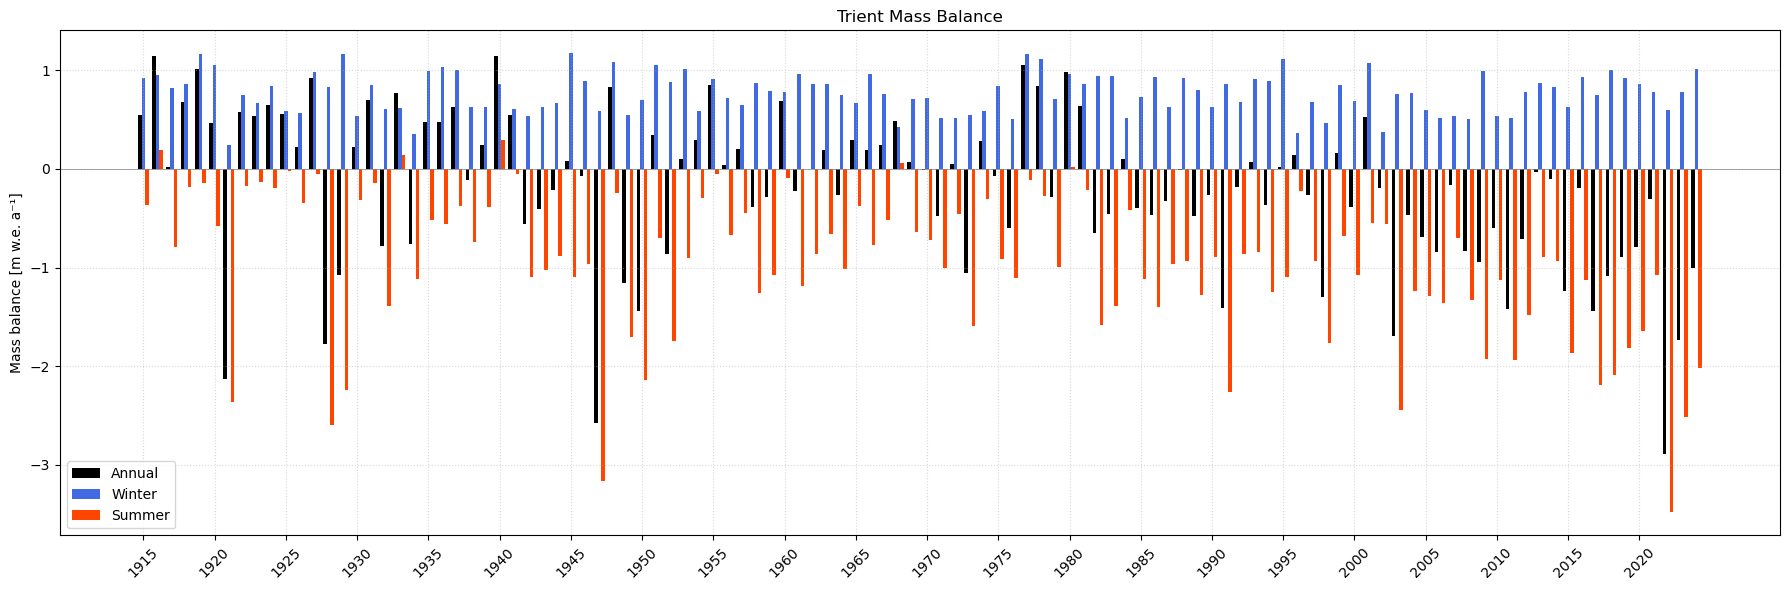

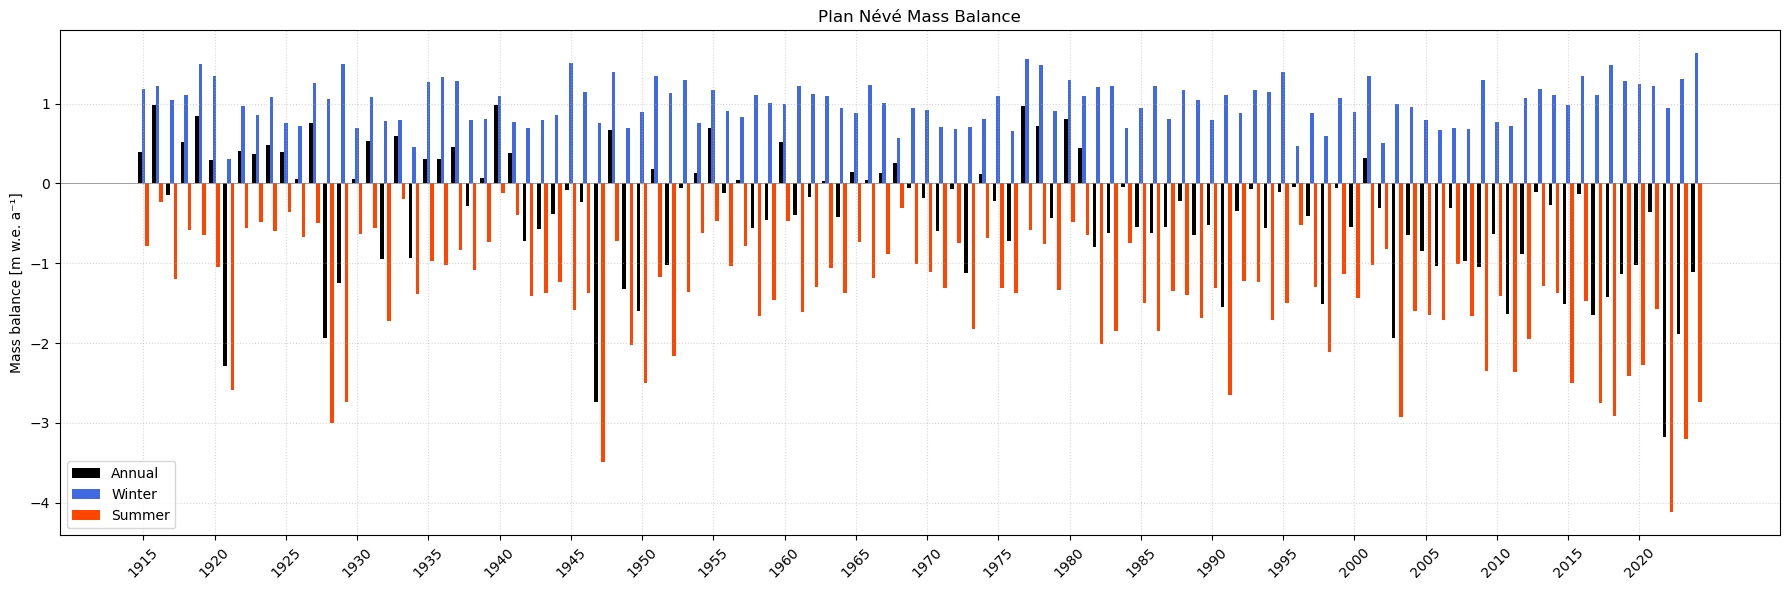

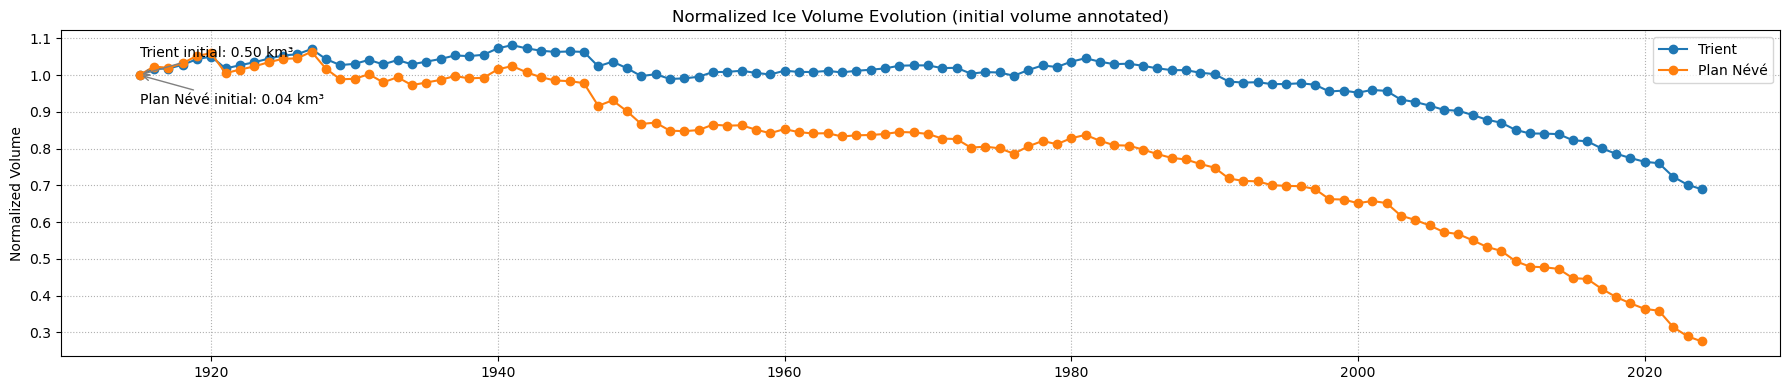

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths
base_path = "/scratch-3/cogier/Glacier-Mass-Balance-Parc-Trient/data/GLAMOS_data/"
annual_path = base_path + "massbalance_evolution_single.dat"
winter_path = base_path + "massbalance_evolution_single_win.dat"
volume_path = base_path + "volume_evolution_single.dat"

# Glacier IDs
glacier_ids = {
    "Trient": "B90-02",
    "Plan Névé": "B93-06"
}

def load_mass_balance_data(filepath, skip_rows=1):
    """Load mass balance data (annual or winter) into a pandas DataFrame."""
    df = pd.read_csv(filepath, delim_whitespace=True, skiprows=skip_rows, index_col=0)
    df.columns = df.columns.astype(int)  # Years as integers
    return df

# Load data
annual_df = load_mass_balance_data(annual_path)
winter_df = load_mass_balance_data(winter_path)
volume_df = load_mass_balance_data(volume_path)

# Calculate summer balance: summer = annual - winter
summer_df = annual_df - winter_df

# Create plots/ folder if it doesn't exist
os.makedirs(base_path + "plots", exist_ok=True)

# Function to plot mass balance
def plot_mass_balance(glacier_name, sgi_id):
    years = annual_df.columns
    ann = annual_df.loc[sgi_id]
    win = winter_df.loc[sgi_id]
    sumr = summer_df.loc[sgi_id]

    width = 0.25
    x = np.arange(len(years))

    plt.figure(figsize=(18, 6))
    plt.bar(x - width, ann, width=width, label='Annual', color='black')
    plt.bar(x, win, width=width, label='Winter', color='royalblue')
    plt.bar(x + width, sumr, width=width, label='Summer', color='orangered')

    plt.axhline(0, color='gray', linewidth=0.5)
    plt.xticks(ticks=x[::5], labels=years[::5], rotation=45)
    plt.ylabel("Mass balance [m w.e. a⁻¹]")
    plt.title(f"{glacier_name} Mass Balance")
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.tight_layout()
    
    filename = f"plots/mass_balance_{glacier_name.lower().replace(' ', '_')}.png"
    plt.savefig(base_path + filename, dpi=300)
    
    plt.show()

# Function to plot normalized volume for both glaciers
def plot_volume_combined(glacier_ids):
    years = volume_df.columns

    plt.figure(figsize=(18, 4))
    vertical_shifts = [0.05, -0.08]  # Vertical offsets for annotation to avoid overlap

    for i, (name, sgi) in enumerate(glacier_ids.items()):
        vol = volume_df.loc[sgi]
        norm_vol = vol / vol.iloc[0]
        plt.plot(years, norm_vol, marker='o', label=name)

        initial_vol = vol.iloc[0]
        plt.annotate(f"{name} initial: {initial_vol:.2f} km³",
                     xy=(years[0], norm_vol.iloc[0]),
                     xytext=(years[0], norm_vol.iloc[0] + vertical_shifts[i]),
                     fontsize=10,
                     arrowprops=dict(arrowstyle="->", color='gray'))

    plt.ylabel("Normalized Volume")
    plt.title("Normalized Ice Volume Evolution (initial volume annotated)")
    plt.grid(True, linestyle=':')
    plt.legend()
    plt.tight_layout()

    filename = "plots/volume_combined_normalized.png"
    plt.savefig(base_path + filename, dpi=300)

    plt.show()

# Plot for both glaciers
for name, sgi in glacier_ids.items():
    plot_mass_balance(name, sgi)

plot_volume_combined(glacier_ids)
